In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('processed_with_emotion.csv')

display(data.head())

,created_utc,text,emotion
0,2025-09-16 17:13:39+00:00,"Imagine that 5 minutes ago, this person had an...","neutral, realization"
1,2025-09-16 17:18:11+00:00,"Honestly, that student is BASED for saying she...","caring, disappointment, remorse, sadness"
2,2025-09-16 17:22:02+00:00,"She was not arrested for mocking anything, she...","anger, annoyance, neutral"
3,2025-09-16 17:25:00+00:00,FAFO moment.,neutral
4,2025-09-16 17:26:27+00:00,"The OP has selected the ""Ask MAGA Only"" flair....",neutral


In [3]:
import json
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D

with open('label2id.json', 'r') as f:
    label2id = json.load(f)

# Exclude neutral, they are tooo common
all_emotions = [emotion for emotion in label2id.keys() if emotion != 'neutral']
print(f"{len(all_emotions)} types of emotions in total (neutral excluded)")
print(f"emo list: {all_emotions}")

27 types of emotions in total (neutral excluded)
emo list: ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise']


In [4]:
# convert created_utc to date
data['date'] = pd.to_datetime(data['created_utc']).dt.date

# date range and daily counts
print(f"date range: {data['date'].min()} to {data['date'].max()}, totally {data['date'].nunique()} days")

print("\nDaily sample counts:")
daily_counts = data['date'].value_counts().sort_index()
for date, count in daily_counts.items():
    print(f"  {date}: {count} samples")

date range: 2025-09-16 to 2025-10-14, totally 29 days

Daily sample counts:
  2025-09-16: 116 samples
  2025-09-17: 164 samples
  2025-09-18: 197 samples
  2025-09-19: 216 samples
  2025-09-20: 131 samples
  2025-09-21: 215 samples
  2025-09-22: 178 samples
  2025-09-23: 258 samples
  2025-09-24: 166 samples
  2025-09-25: 156 samples
  2025-09-26: 214 samples
  2025-09-27: 211 samples
  2025-09-28: 210 samples
  2025-09-29: 232 samples
  2025-09-30: 112 samples
  2025-10-01: 210 samples
  2025-10-02: 189 samples
  2025-10-03: 172 samples
  2025-10-04: 244 samples
  2025-10-05: 99 samples
  2025-10-06: 209 samples
  2025-10-07: 180 samples
  2025-10-08: 198 samples
  2025-10-09: 165 samples
  2025-10-10: 201 samples
  2025-10-11: 215 samples
  2025-10-12: 201 samples
  2025-10-13: 242 samples
  2025-10-14: 51 samples


In [5]:
emotion_counts = []

for date in data['date'].unique():
    day_data = data[data['date'] == date]
    total_entries = len(day_data)

    emotion_count = {emotion: 0 for emotion in all_emotions}
    
    for emotions_str in day_data['emotion']:
        emotions = [e.strip() for e in emotions_str.split(',')]
        for emotion in emotions:
            if emotion in emotion_count:
                emotion_count[emotion] += 1
    
    emotion_proportion = {emotion: count / total_entries for emotion, count in emotion_count.items()}
    emotion_proportion['date'] = date
    emotion_proportion['total_entries'] = total_entries
    emotion_counts.append(emotion_proportion)

emotion_df = pd.DataFrame(emotion_counts)
emotion_df = emotion_df.sort_values('date')
print(f"shape: {emotion_df.shape}")
display(emotion_df.head())

shape: (29, 29)


,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,date,total_entries
0,0.146552,0.112069,0.112069,0.206897,0.189655,0.060345,0.034483,0.112069,0.008621,0.051724,...,0.017241,0.025862,0.00000,0.025862,0.0,0.017241,0.060345,0.034483,2025-09-16,116
1,0.121951,0.067073,0.134146,0.274390,0.182927,0.048780,0.097561,0.146341,0.012195,0.170732,...,0.000000,0.054878,0.00000,0.018293,0.0,0.030488,0.115854,0.030488,2025-09-17,164
2,0.096447,0.096447,0.101523,0.223350,0.182741,0.045685,0.101523,0.121827,0.025381,0.111675,...,0.005076,0.065990,0.00000,0.025381,0.0,0.030457,0.081218,0.030457,2025-09-18,197
3,0.092593,0.055556,0.120370,0.305556,0.148148,0.032407,0.101852,0.143519,0.018519,0.148148,...,0.000000,0.055556,0.00463,0.032407,0.0,0.013889,0.078704,0.023148,2025-09-19,216
4,0.122137,0.129771,0.076336,0.206107,0.328244,0.053435,0.030534,0.061069,0.007634,0.122137,...,0.007634,0.053435,0.00000,0.015267,0.0,0.000000,0.099237,0.038168,2025-09-20,131


In [6]:
# 3D plot data preparation
# X axis: date index
# Y axis: emotion index
# Z axis: proportion

dates = emotion_df['date'].values
date_indices = np.arange(len(dates))

# Create meshgrid
X, Y = np.meshgrid(date_indices, np.arange(len(all_emotions)))

# Z values are the proportion of each emotion on each day
Z = np.zeros((len(all_emotions), len(dates)))

for i, emotion in enumerate(all_emotions):
    Z[i, :] = emotion_df[emotion].values

print(f"3D data preparation completed: X shape={X.shape}, Y shape={Y.shape}, Z shape={Z.shape}")
print(f"Proportion range: {Z.min():.3f} to {Z.max():.3f}")

3D data preparation completed: X shape=(27, 29), Y shape=(27, 29), Z shape=(27, 29)
Proportion range: 0.000 to 0.328


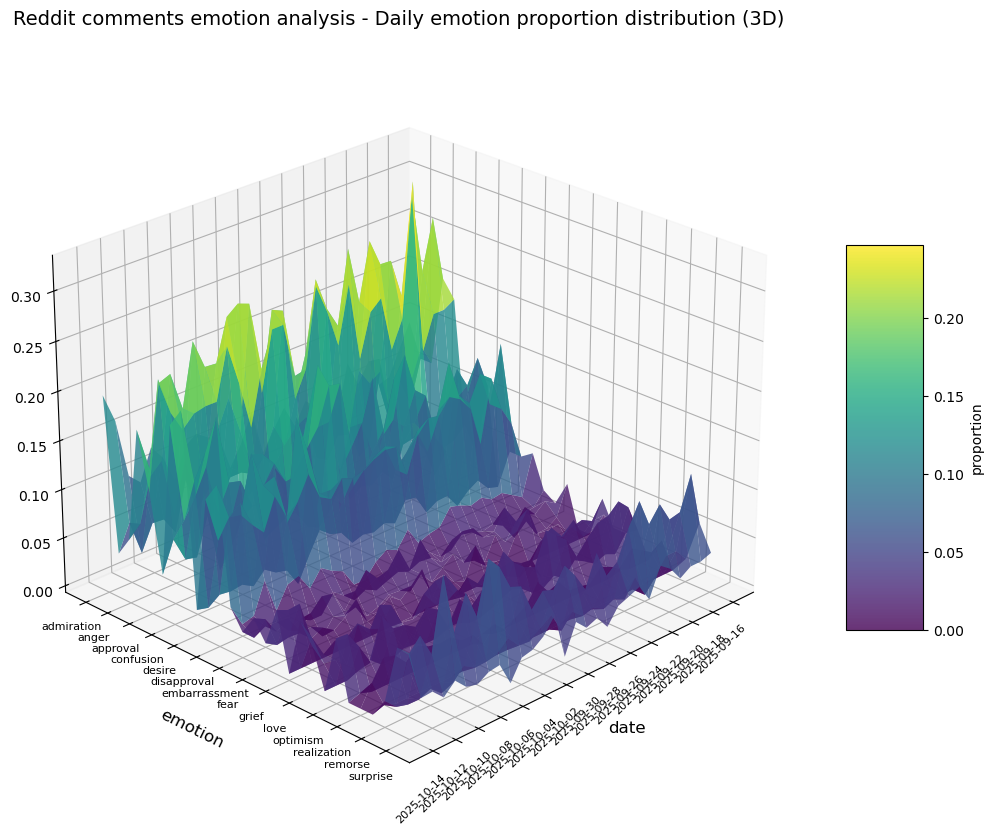

In [7]:
# create 3D plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# plot 3D surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, 
                       edgecolor='none', linewidth=0, antialiased=True)

# set labels
ax.set_xlabel('date', fontsize=12, labelpad=10)
ax.set_ylabel('emotion', fontsize=12, labelpad=10)
ax.set_zlabel('proportion', fontsize=12, labelpad=10)

# set X axis ticks (dates)
date_step = max(1, len(dates) // 10)  # show up to 10 date labels
ax.set_xticks(date_indices[::date_step])
ax.set_xticklabels([str(d) for d in dates[::date_step]], rotation=45, ha='right', fontsize=8)

# set Y axis ticks (emotions)
emotion_step = max(1, len(all_emotions) // 10)  # control label quantity
ax.set_yticks(np.arange(len(all_emotions))[::emotion_step])
ax.set_yticklabels([all_emotions[i] for i in range(0, len(all_emotions), emotion_step)], fontsize=8)

# set title
ax.set_title('Reddit comments emotion analysis - Daily emotion proportion distribution (3D)', fontsize=14, pad=20)

# add color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='proportion')
# adjust view angle
ax.view_init(elev=25, azim=45)

plt.show()

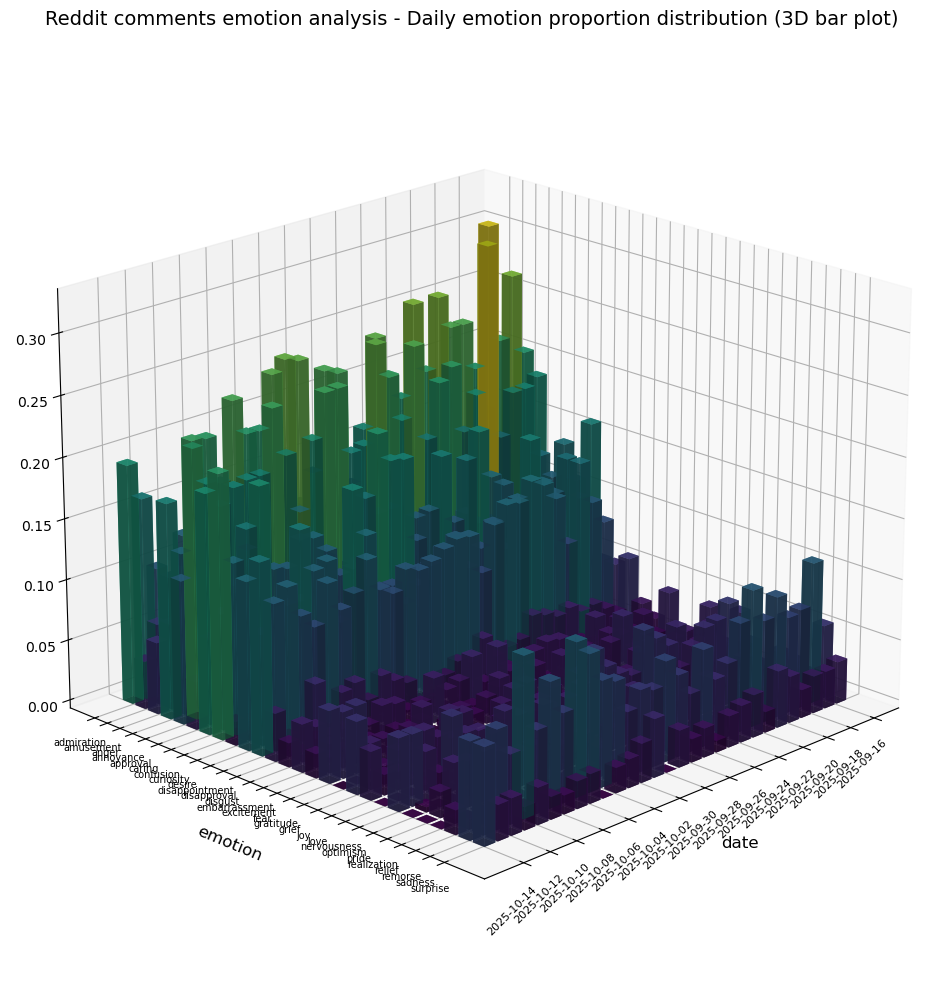

In [8]:
# 3D bar plot
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# create bars for each date and emotion combination
xpos, ypos = [], []
zpos = []
dx, dy = 0.8, 0.8
dz = []

colors = []
cmap = plt.cm.viridis

for i, date_idx in enumerate(date_indices):
    for j, emotion in enumerate(all_emotions):
        xpos.append(date_idx)
        ypos.append(j)
        zpos.append(0)
        dz.append(Z[j, i])
        colors.append(cmap(Z[j, i] / Z.max()))

# draw 3D bar plot
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, alpha=0.8)

# set axis labels
ax.set_xlabel('date', fontsize=12, labelpad=10)
ax.set_ylabel('emotion', fontsize=12, labelpad=10)
ax.set_zlabel('proportion', fontsize=12, labelpad=10)

# set X axis ticks (dates)
date_step = max(1, len(dates) // 10)
ax.set_xticks(date_indices[::date_step])
ax.set_xticklabels([str(d) for d in dates[::date_step]], rotation=45, ha='right', fontsize=8)

# set Y axis ticks (emotions)
ax.set_yticks(np.arange(len(all_emotions)))
ax.set_yticklabels(all_emotions, fontsize=7)

# set title
ax.set_title('Reddit comments emotion analysis - Daily emotion proportion distribution (3D bar plot)', fontsize=14, pad=20)

# adjust view angle
ax.view_init(elev=20, azim=45)

plt.show()

## Interactive Visualization with Plotly

In [9]:
import plotly.graph_objects as go

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# prepare data - create trace for each date and emotion combination
fig = go.Figure()

# create a line for each emotion (time series)
for j, emotion in enumerate(all_emotions):
    fig.add_trace(go.Scatter3d(
        x=date_indices,
        y=[j] * len(date_indices),
        z=Z[j, :],
        mode='lines+markers',
        name=emotion,
        line=dict(width=4),
        marker=dict(size=5),
        visible=True,
        hovertemplate=f'<b>{emotion}</b><br>' +
                      'date: %{customdata}<br>' +
                      'proportion: %{z:.3f}<extra></extra>',
        customdata=[str(dates[i]) for i in range(len(dates))]
    ))

# add buttons for filtering emotion groups
emotion_groups = {
    'All': list(range(len(all_emotions))),
    'None': [],
    'Negative Emotions': [i for i, e in enumerate(all_emotions) if e in ['anger', 'annoyance', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'fear', 'grief', 'nervousness', 'remorse', 'sadness']],
    'Positive Emotions': [i for i, e in enumerate(all_emotions) if e in ['admiration', 'amusement', 'approval', 'caring', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief']],
    'Neutral Emotions': [i for i, e in enumerate(all_emotions) if e in ['confusion', 'curiosity', 'desire', 'realization', 'surprise']],
}

# create buttons
buttons = []
for group_name, indices in emotion_groups.items():
    visible = ['legendonly' if i not in indices else True for i in range(len(all_emotions))]
    buttons.append(
        dict(
            label=group_name,
            method='update',
            args=[{'visible': visible}]
        )
    )

fig.update_layout(
    title='Reddit comments emotion analysis - Daily emotion proportion distribution (3D)',
    scene=dict(
        xaxis=dict(
            title='Date',
            tickmode='array',
            tickvals=list(range(0, len(dates), max(1, len(dates)//10))),
            ticktext=[str(dates[i]) for i in range(0, len(dates), max(1, len(dates)//10))]
        ),
        yaxis=dict(
            title='Emotion Index',
            tickmode='array',
            tickvals=list(range(len(all_emotions))),
            ticktext=all_emotions
        ),
        zaxis=dict(title='Proportion'),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.3))
    ),
    updatemenus=[
        dict(
            type='buttons',
            direction='left',
            buttons=buttons,
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.0,
            xanchor='left',
            y=1.0,
            yanchor='top'
        )
    ],
    width=1600,
    height=900,
    showlegend=True,
    legend=dict(
        title='<b>Click legend to show/hide individual emotions</b>',
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    )
)

fig.write_html('emotion_analysis_filterable.html')

In [20]:
!start emotion_analysis_filterable.html

In [19]:
fig = go.Figure()

# add a bar for each emotion, initially showing the first date's data
for j, emotion in enumerate(all_emotions):
    fig.add_trace(go.Bar(
        x=[emotion],
        y=[Z[j, 0]],  # initially show the first day's data
        name=emotion,
        marker_color=f'rgb({j*9}, {150-j*2}, {200})',
        hovertemplate=f'<b>{emotion}</b><br>Proportion: %{{y:.3f}}<extra></extra>'
    ))

# create a frame for each date
frames = []
for i, date in enumerate(dates):
    frame_data = []
    for j, emotion in enumerate(all_emotions):
        frame_data.append(go.Bar(
            x=[emotion],
            y=[Z[j, i]],
            marker_color=f'rgb({j*9}, {150-j*2}, {200})'
        ))
    frames.append(go.Frame(data=frame_data, name=str(date)))

fig.frames = frames

# add play and pause buttons, and a slider
fig.update_layout(
    title=f'Reddit comments emotion analysis - Filter by date',
    xaxis=dict(title='Emotion', tickangle=45, tickfont=dict(size=18)),
    yaxis=dict(title='Proportion', range=[0, Z.max() * 1.1], tickfont=dict(size=16)),
    showlegend=False,
    width=1600,
    height=900,
    sliders=[
        dict(
            active=0,
            yanchor='top',
            y=-0.2,
            xanchor='left',
            currentvalue=dict(
                prefix='Date: ',
                visible=True,
                xanchor='center'
            ),
            pad=dict(b=10, t=50),
            len=0.9,
            x=0.1,
            steps=[
                dict(
                    args=[[str(date)], {
                        'frame': {'duration': 300, 'redraw': True},
                        'mode': 'immediate',
                        'transition': {'duration': 300}
                    }],
                    label=str(date),
                    method='animate'
                ) for date in dates
            ]
        )
    ]
)

fig.write_html('emotion_analysis_by_date.html')

In [14]:
!start emotion_analysis_by_date.html